In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# View first few rows
print(df.head())

# Check data types and missing values
print(df.info())
print(df.isnull().sum())

# Class distribution
print(df['HeartDisease'].value_counts())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy dataframe so original stays safe
data = df.copy()

# List categorical columns to encode
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Separate features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training feature set shape: (734, 11)
Test feature set shape: (184, 11)
Training labels shape: (734,)
Test labels shape: (184,)


# **Logistic Regression**

Accuracy: 0.842391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



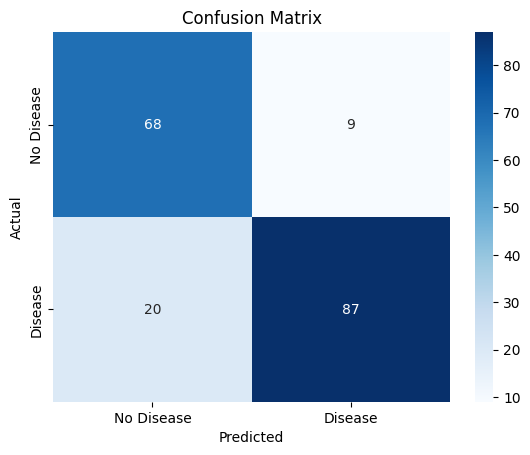

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Feature Scaling and SVM model**

SVM Accuracy: 0.8641304347826086

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



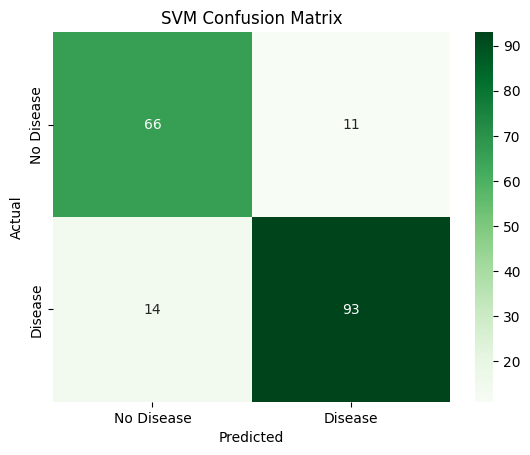

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training features and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model with default parameters
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


# **Hyperparameter tuning for SVM model**

In [5]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM
svm = SVC(random_state=42)

# Initialize GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearch on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate best model on test set
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

print("\nTest set accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTest set classification report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.866470971950424

Test set accuracy: 0.8641304347826086

Test set classification report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# **Random Forest Classifier**

Random Forest Accuracy: 0.8804347826086957

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



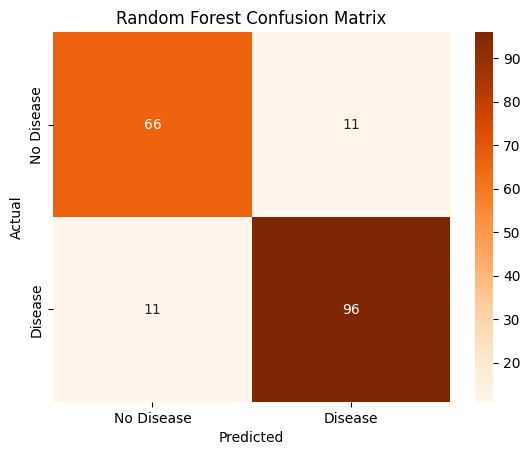

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


# **Hyperparameter tuning for Random Forest**

In [7]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearch with 5-fold CV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy:", grid_search_rf.best_score_)

# Evaluate best model on test data
best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

print("\nTest set accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nTest set classification report:\n", classification_report(y_test, y_pred_rf_best))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy: 0.8746528748485695

Test set accuracy: 0.8967391304347826

Test set classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        77
           1       0.92      0.90      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



# **ROC curve for RandomForest**


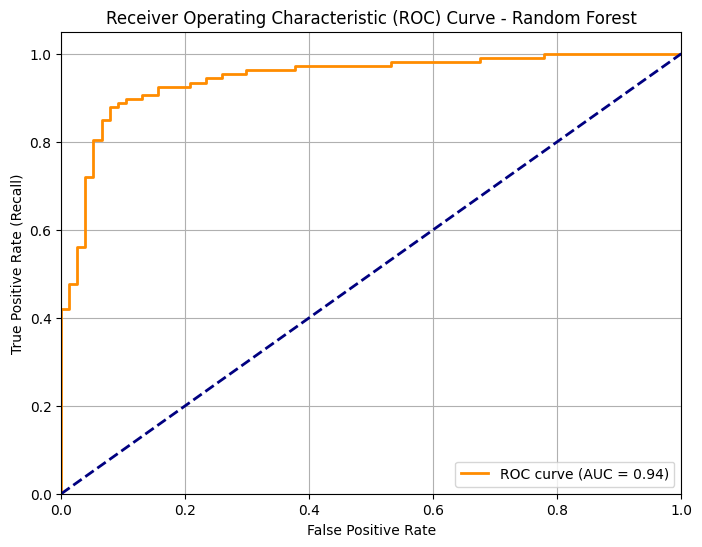

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [9]:
!pip install lightgbm


In [10]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# Prepare dataset for LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# Set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42
}

# Train LightGBM model
lgb_model = lgb.train(params, lgb_train, num_boost_round=100)

# Predict on test set (returns probabilities)
y_pred_lgb_prob = lgb_model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_lgb = (y_pred_lgb_prob >= 0.5).astype(int)

# Evaluate
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))


LightGBM Accuracy: 0.8369565217391305

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [11]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Initialize LGBMClassifier
lgbm = LGBMClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [20, 30, 40]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best params and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate best model on test set
best_lgbm = grid_search.best_estimator_
y_pred_best_lgbm = best_lgbm.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("\nTest set accuracy:", accuracy_score(y_test, y_pred_best_lgbm))
print("\nTest set classification report:\n", classification_report(y_test, y_pred_best_lgbm))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 40, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validation accuracy: 0.8760134190662565

Test set accuracy: 0.8804347826086957

Test set classification report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# **ROC Curve for LightGBM**

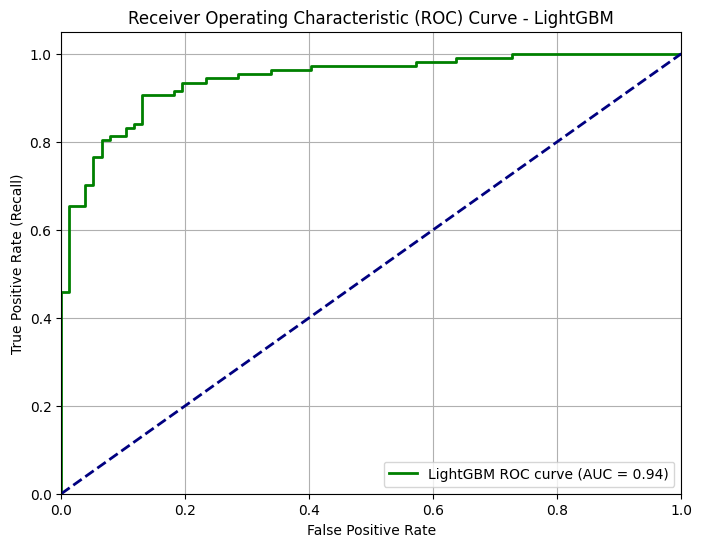

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs_lgb = best_lgbm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_probs_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_lgb, tpr_lgb, color='green', lw=2, label=f'LightGBM ROC curve (AUC = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **Comparing ROC Curve for RandomForest and LightGBM**

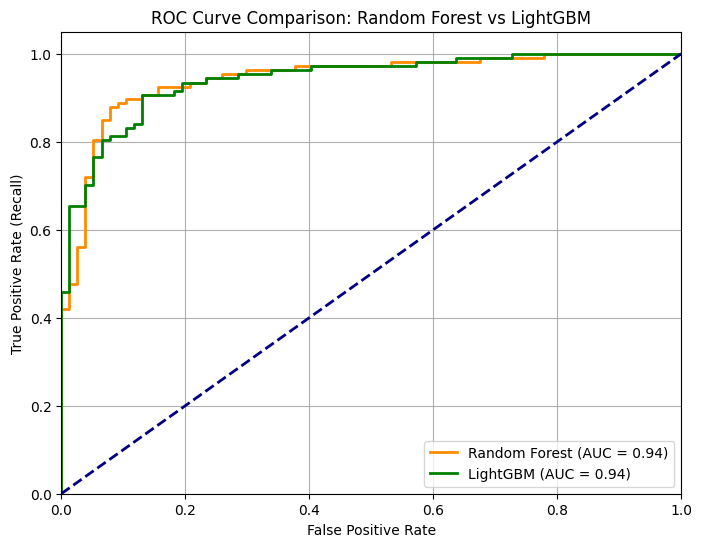

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for Random Forest and LightGBM
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]
y_probs_lgb = best_lgbm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_probs_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curves together
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lgb, tpr_lgb, color='green', lw=2, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison: Random Forest vs LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()